# Imports & File Load

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
# import requests
# import json
import re
# import os
# import time
# from bs4 import BeautifulSoup
from collections import Counter
%matplotlib inline

In [2]:
df = pd.read_csv("sources/judges.csv")
df.head()

,nid,jid,Last Name,First Name,Middle Name,Suffix,Birth Month,Birth Day,Birth Year,Birth City,...,Degree (3),Degree Year (3),School (4),Degree (4),Degree Year (4),School (5),Degree (5),Degree Year (5),Professional Career,Other Nominations/Recess Appointments
0,1394646,3563,Abrams,Leslie,Joyce,,NaN,NaN,1974,Madison,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Law clerk, Hon. Marvin J. Garbis, U.S. Distric...",NaN
1,1393931,3419,Abrams,Ronnie,,,NaN,NaN,1968,New York,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Law clerk, Hon. Thomas P. Griesa, U.S. Distric...",NaN
2,1376976,1,Abruzzo,Matthew,T.,,4.0,30.0,1889,Brooklyn,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Private practice, Brooklyn, New York, 1910-1936",NaN
3,1376981,2,Acheson,Marcus,Wilson,,6.0,7.0,1828,Washington,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Private practice, Pittsburgh, Pennsylvania, 18...",NaN
4,1376986,3,Acker,William,Marsh,Jr.,10.0,25.0,1927,Birmingham,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"U.S. Army private first class, 1946-1947; Priv...",NaN


# File Investigation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Columns: 201 entries, nid to Other Nominations/Recess Appointments
dtypes: float64(43), int64(2), object(156)
memory usage: 3.5+ MB


In [4]:
original_size = df.memory_usage().sum()
original_size

3634936

In [5]:
# df.dtypes
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 201 columns):
nid                                      int64
jid                                      int64
Last Name                                object
First Name                               object
Middle Name                              object
Suffix                                   object
Birth Month                              float64
Birth Day                                float64
Birth Year                               object
Birth City                               object
Birth State                              object
Death Month                              float64
Death Day                                float64
Death Year                               float64
Death City                               object
Death State                              object
Gender                                   object
Race or Ethnicity                        object
Court Type (1)           

In [6]:
# df = df.drop(columns='url')

In [7]:
# df.profile_report()

# Basic Clean
- make easy column headers
- remove the circa abbreviation everywhere 
- convert separated birth/death info to united field
- convert all string dates into datetime
- convert year-only dates into datetime

In [8]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('/', '-')
df.columns = df.columns.str.replace('\(|\)|,', '')
df.replace('ca. ','',regex=True,inplace=True)

In [9]:
df['Birth_Month'] = pd.to_numeric(df['Birth_Month'], errors='coerce').fillna(value=9).astype(int)
df['Birth_Day'] = pd.to_numeric(df['Birth_Day'], errors='coerce').fillna(value=30).astype(int)
df['Birth_Year'] = pd.to_numeric(df['Birth_Year'], errors='coerce').fillna(value=1677).astype(int)
df['Birth_Date'] = df.Birth_Year.map(str).astype(str).str.zfill(4) + '-' + df.Birth_Month.map(str).astype(str).str.zfill(2) + '-' + df.Birth_Day.map(str).astype(str).str.zfill(2)
df['Death_Month'] = pd.to_numeric(df['Death_Month'], errors='coerce').fillna(value=9).astype(int)
df['Death_Day'] = pd.to_numeric(df['Death_Day'], errors='coerce').fillna(value=30).astype(int)
df['Death_Year'] = pd.to_numeric(df['Death_Year'], errors='coerce').fillna(value=1677).astype(int)
df['Death_Date'] = df.Death_Year.map(str).astype(str).str.zfill(4) + '-' + df.Death_Month.map(str).astype(str).str.zfill(2) + '-' + df.Death_Day.map(str).astype(str).str.zfill(2)

In [10]:
df.Death_Date

0       1677-09-30
1       1677-09-30
2       1971-05-28
3       1906-06-21
4       2018-06-21
5       2009-12-02
6       1984-11-23
7       2014-12-23
8       1956-01-19
9       2015-12-22
10      1916-10-24
11      1844-08-14
12      1911-10-09
13      1677-09-30
14      1677-09-30
15      1929-01-03
16      1677-09-30
17      1955-03-29
18      1934-05-23
19      1677-09-30
20      1677-09-30
21      1677-09-30
22      1677-09-30
23      1981-12-22
24      1948-08-21
25      2009-12-30
26      2015-01-28
27      1677-09-30
28      1677-09-30
29      2014-12-28
           ...    
3664    1677-09-30
3665    1986-09-03
3666    1677-09-30
3667    1677-09-30
3668    1975-02-09
3669    1677-09-30
3670    1677-09-30
3671    1932-04-11
3672    1996-05-10
3673    2015-04-24
3674    1932-05-27
3675    1969-08-20
3676    1914-02-25
3677    2015-03-14
3678    1677-09-30
3679    1677-09-30
3680    1978-06-21
3681    1677-09-30
3682    1677-09-30
3683    2004-01-12
3684    1677-09-30
3685    2015

In [12]:
forceDT = [
    'Birth_Date',
    'Death_Date',
    'Recess_Appointment_Date_1',
    'Nomination_Date_1',
    'Committee_Referral_Date_1',
    'Hearing_Date_1',
    'Committee_Action_Date_1',
    'Confirmation_Date_1',
    'Commission_Date_1',
    'Service_as_Chief_Judge_Begin_1',
    'Service_as_Chief_Judge_End_1',
    '2nd_Service_as_Chief_Judge_Begin_1',
    '2nd_Service_as_Chief_Judge_End_1',
    'Senior_Status_Date_1',
    'Termination_Date_1',
    'Recess_Appointment_Date_2',
    'Nomination_Date_2',
    'Committee_Referral_Date_2',
    'Hearing_Date_2',
    'Committee_Action_Date_2',
    'Confirmation_Date_2',
    'Commission_Date_2',
    'Service_as_Chief_Judge_Begin_2',
    'Service_as_Chief_Judge_End_2',
    '2nd_Service_as_Chief_Judge_Begin_2',
    '2nd_Service_as_Chief_Judge_End_2',
    'Senior_Status_Date_2',
    'Termination_Date_2',
    'Recess_Appointment_Date_3',
    'Nomination_Date_3',
    'Committee_Referral_Date_3',
    'Hearing_Date_3',
    'Committee_Action_Date_3',
    'Confirmation_Date_3',
    'Commission_Date_3',
    'Service_as_Chief_Judge_Begin_3',
    'Service_as_Chief_Judge_End_3',
    '2nd_Service_as_Chief_Judge_Begin_3',
    '2nd_Service_as_Chief_Judge_End_3',
    'Senior_Status_Date_3',
    'Termination_Date_3',
    'Recess_Appointment_Date_4',
    'Nomination_Date_4',
    'Committee_Referral_Date_4',
    'Hearing_Date_4',
    'Committee_Action_Date_4',
    'Confirmation_Date_4',
    'Commission_Date_4',
    'Service_as_Chief_Judge_Begin_4',
    'Service_as_Chief_Judge_End_4',
    '2nd_Service_as_Chief_Judge_Begin_4',
    '2nd_Service_as_Chief_Judge_End_4',
    'Senior_Status_Date_4',
    'Termination_Date_4',
    'Recess_Appointment_Date_5',
    'Nomination_Date_5',
    'Committee_Referral_Date_5',
    'Hearing_Date_5',
    'Committee_Action_Date_5',
    'Confirmation_Date_5',
    'Commission_Date_5',
    'Service_as_Chief_Judge_Begin_5',
    'Service_as_Chief_Judge_End_5',
    '2nd_Service_as_Chief_Judge_Begin_5',
    '2nd_Service_as_Chief_Judge_End_5',
    'Senior_Status_Date_5',
    'Termination_Date_5',
    'Recess_Appointment_Date_6',
    'Nomination_Date_6',
    'Committee_Referral_Date_6',
    'Hearing_Date_6',
    'Committee_Action_Date_6',
    'Confirmation_Date_6',
    'Commission_Date_6',
    'Service_as_Chief_Judge_Begin_6',
    'Service_as_Chief_Judge_End_6',
    '2nd_Service_as_Chief_Judge_Begin_6',
    '2nd_Service_as_Chief_Judge_End_6',
    'Senior_Status_Date_6',
    'Termination_Date_6'
]
df[forceDT] = df[forceDT].apply(pd.to_datetime)
df.dtypes.head(50)

nid                                            int64
jid                                            int64
Last_Name                                     object
First_Name                                    object
Middle_Name                                   object
Suffix                                        object
Birth_Month                                    int32
Birth_Day                                      int32
Birth_Year                                     int32
Birth_City                                    object
Birth_State                                   object
Death_Month                                    int32
Death_Day                                      int32
Death_Year                                     int32
Death_City                                    object
Death_State                                   object
Gender                                        object
Race_or_Ethnicity                             object
Court_Type_1                                  

In [13]:
df['Degree_Year_1'] = pd.to_datetime(df['Degree_Year_1'],format='%Y', errors='coerce')
df['Degree_Year_2'] = pd.to_datetime(df['Degree_Year_2'],format='%Y', errors='coerce')
df['Degree_Year_3'] = pd.to_datetime(df['Degree_Year_3'],format='%Y', errors='coerce')
df['Degree_Year_4'] = pd.to_datetime(df['Degree_Year_4'],format='%Y', errors='coerce')
df['Degree_Year_5'] = pd.to_datetime(df['Degree_Year_5'],format='%Y', errors='coerce')

In [14]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 203 columns):
nid                                      int64
jid                                      int64
Last_Name                                object
First_Name                               object
Middle_Name                              object
Suffix                                   object
Birth_Month                              int32
Birth_Day                                int32
Birth_Year                               int32
Birth_City                               object
Birth_State                              object
Death_Month                              int32
Death_Day                                int32
Death_Year                               int32
Death_City                               object
Death_State                              object
Gender                                   object
Race_or_Ethnicity                        object
Court_Type_1                        

# Basic Research

### Most Appointments

In [15]:
df.Appointing_President_1.value_counts().head()

William J. Clinton    357
Ronald Reagan         347
George W. Bush        310
Barack Obama          308
Jimmy Carter          247
Name: Appointing_President_1, dtype: int64

### Qualifications
- ABA Rating
- Committee Recommendations
- Termination Types

In [16]:
df.ABA_Rating_1.value_counts()

Well Qualified                    1248
Qualified                          948
Not Qualified                       17
Exceptionally Well Qualified        11
Not Qualified By Reason of Age       3
Name: ABA_Rating_1, dtype: int64

In [17]:
df[df.ABA_Rating_1.str.contains("Not", na=False)]['Appointing_President_1'].value_counts()

Lyndon B. Johnson     5
George W. Bush        4
Donald J. Trump       4
William J. Clinton    3
Jimmy Carter          3
John F. Kennedy       1
Name: Appointing_President_1, dtype: int64

In [18]:
df[df.ABA_Rating_1.str.contains("Not", na=False)][['Last_Name','ABA_Rating_1','Appointing_President_1','Confirmation_Date_1']].sort_values(by='Confirmation_Date_1', ascending=False)

,Last_Name,ABA_Rating_1,Appointing_President_1,Confirmation_Date_1
1829,Kobes,Not Qualified,Donald J. Trump,2018-12-11
1242,Goodwin,Not Qualified,Donald J. Trump,2018-08-28
3261,Teeter,Not Qualified,Donald J. Trump,2018-08-01
1269,Grasz,Not Qualified,Donald J. Trump,2017-12-12
3385,Van Tatenhove,Not Qualified,George W. Bush,2005-12-21
1609,Irizarry,Not Qualified,George W. Bush,2004-06-24
220,Benitez,Not Qualified,George W. Bush,2004-06-17
444,Bunning,Not Qualified,George W. Bush,2002-02-14
1352,Hamilton,Not Qualified,William J. Clinton,1994-10-07
1724,Katz,Not Qualified,William J. Clinton,1994-10-07


In [19]:
df[df.ABA_Rating_2.str.contains("Not", na=False)][['Last_Name','ABA_Rating_2','Appointing_President_2','Confirmation_Date_2']].sort_values(by='Confirmation_Date_2', ascending=False)

,Last_Name,ABA_Rating_2,Appointing_President_2,Confirmation_Date_2
2487,O'Brien,Not Qualified,Jimmy Carter,1978-10-04
605,Christie,Not Qualified By Reason of Age,Lyndon B. Johnson,1964-04-30


In [20]:
df[df.ABA_Rating_3.str.contains("Not", na=False)][['Last_Name','ABA_Rating_3','Appointing_President_3','Confirmation_Date_3']].sort_values(by='Confirmation_Date_3', ascending=False)

,Last_Name,ABA_Rating_3,Appointing_President_3,Confirmation_Date_3


In [21]:
df.Judiciary_Committee_Action_1.value_counts()

Reported (favorably)                     3378
Reported (no recommendation recorded)      99
Not Referred to Committee                  84
No Committee before December 10, 1816      84
Not Reported                               15
Reported (unfavorably)                      9
Reported (unknown)                          9
Reported (without recommendation)           4
Recommended Postponement                    1
Name: Judiciary_Committee_Action_1, dtype: int64

In [22]:
df[~df.Judiciary_Committee_Action_1.str.contains("\(favorably", na=False)][['Last_Name','Judiciary_Committee_Action_1','Appointing_President_1','Confirmation_Date_1']].sort_values(by='Confirmation_Date_1', ascending=False).dropna().head(60)

,Last_Name,Judiciary_Committee_Action_1,Appointing_President_1,Confirmation_Date_1
1512,Holmes,Reported (without recommendation),George W. Bush,2004-07-06
2055,Manion,Reported (without recommendation),Ronald Reagan,1986-06-26
2286,Miller,Not Referred to Committee,Richard M. Nixon,1973-06-28
1456,Hickey,Reported (no recommendation recorded),Lyndon B. Johnson,1966-06-09
2969,Seitz,Reported (no recommendation recorded),Lyndon B. Johnson,1966-06-09
3091,Smith,Reported (no recommendation recorded),Lyndon B. Johnson,1966-03-25
1430,Heebe,Reported (no recommendation recorded),Lyndon B. Johnson,1966-03-25
975,Edwards,Reported (no recommendation recorded),John F. Kennedy,1963-12-16
935,Dumbauld,Not Reported,John F. Kennedy,1961-08-02
3588,Wilson,Reported (no recommendation recorded),John F. Kennedy,1961-06-14


In [23]:
df.Termination_1.value_counts()

Death                                       1417
Appointment to Another Judicial Position     353
Retirement                                   271
Resignation                                  235
Reassignment                                 116
Abolition of Court                            29
Recess Appointment-Not Confirmed              23
Impeachment & Conviction                       7
Name: Termination_1, dtype: int64

In [24]:
df[df.Termination_1.str.contains("Impeachment", na=False)][['First_Name','Last_Name','Termination_1','Appointing_President_1','Confirmation_Date_1']].sort_values(by='Confirmation_Date_1', ascending=False)

,First_Name,Last_Name,Termination_1,Appointing_President_1,Confirmation_Date_1
2656,G.,Porteous,Impeachment & Conviction,William J. Clinton,1994-10-07
1400,Alcee,Hastings,Impeachment & Conviction,Jimmy Carter,1979-10-31
612,Harry,Claiborne,Impeachment & Conviction,Jimmy Carter,1978-08-11
2462,Walter,Nixon,Impeachment & Conviction,Lyndon B. Johnson,1968-06-06
2790,Halsted,Ritter,Impeachment & Conviction,Calvin Coolidge,1929-02-15
1574,West,Humphreys,Impeachment & Conviction,Franklin Pierce,1853-03-26
2619,John,Pickering,Impeachment & Conviction,George Washington,1795-02-11


In [25]:
df[df.Termination_1.str.contains("Recess", na=False)][['Last_Name','Termination_1','Appointing_President_1','Recess_Appointment_Date_1']].sort_values(by='Recess_Appointment_Date_1', ascending=False)

,Last_Name,Termination_1,Appointing_President_1,Recess_Appointment_Date_1
1431,Heen,Recess Appointment-Not Confirmed,Jimmy Carter,1981-01-01
2703,Rabinovitz,Recess Appointment-Not Confirmed,Lyndon B. Johnson,1964-01-07
1040,Feikens,Recess Appointment-Not Confirmed,Dwight D. Eisenhower,1960-10-13
1443,Henley,Recess Appointment-Not Confirmed,Dwight D. Eisenhower,1958-10-25
1125,Friedman,Recess Appointment-Not Confirmed,Harry S Truman,1952-07-17
71,Andrews,Recess Appointment-Not Confirmed,Harry S Truman,1949-10-21
3229,Switzer,Recess Appointment-Not Confirmed,Harry S Truman,1949-10-21
1380,Harper,Recess Appointment-Not Confirmed,Harry S Truman,1947-08-07
2798,Roberts,Recess Appointment-Not Confirmed,Franklin D. Roosevelt,1938-07-06
1650,Johnson,Recess Appointment-Not Confirmed,Herbert Hoover,1932-08-03


### Gender & Race Breakdowns

In [26]:
df.groupby(by='Party_of_Appointing_President_1').Gender.value_counts(1)

Party_of_Appointing_President_1  Gender
Democratic                       Male      0.836675
                                 Female    0.163325
Federalist                       Male      1.000000
Jeffersonian Republican          Male      1.000000
None (reassignment)              Male      1.000000
Republican                       Male      0.914286
                                 Female    0.085714
Whig                             Male      1.000000
Name: Gender, dtype: float64

In [27]:
df.groupby(by='Party_of_Appointing_President_1').Race_or_Ethnicity.value_counts(1)

Party_of_Appointing_President_1  Race_or_Ethnicity              
Democratic                       White                              0.843750
                                 AfriAmerican                       0.095519
                                 Hispanic                           0.040094
                                 Asian American                     0.013561
                                 AmeriIndian                        0.001769
                                 AfriAmerican/Hispanic              0.001179
                                 Asian American/Pacific Islander    0.001179
                                 Hispanic/White                     0.001179
                                 AfriAmerican/White                 0.000590
                                 Asian American/Hispanic            0.000590
                                 Asian American/White               0.000590
Federalist                       White                              1.000000
Jeffersonia

### Declined & Rejected Appointments

In [28]:
df[df['Other_Nominations-Recess_Appointments'].str.contains("(?i)Declined", na=False)][['Last_Name','Other_Nominations-Recess_Appointments','Appointing_President_1','Confirmation_Date_1']].sort_values(by='Confirmation_Date_1', ascending=False)

,Last_Name,Other_Nominations-Recess_Appointments,Appointing_President_1,Confirmation_Date_1
307,Boreman,Received recess appointment to U.S. Court of A...,Dwight D. Eisenhower,1954-07-21
1652,Johnson,"Nominated to U.S. Customs Court, March 29, 194...",Harry S Truman,1947-06-23
41,Allred,Received recess appointment to U.S. District C...,Franklin D. Roosevelt,1939-02-16
1160,Garrett,Received recess appointment to U.S. District C...,Calvin Coolidge,1929-02-18
2138,McCarthy,Nominated to U.S. District Court for the Distr...,Calvin Coolidge,1929-01-08
2467,Norcross,Received recess appointment to U.S. Court of A...,Calvin Coolidge,1928-04-17
829,Day,Received recess appointment to U.S. District C...,William McKinley,1899-02-28
864,Dick,Received recess appointment to U.S. District C...,Ulysses Grant,1872-06-07
3609,Withey,Nominated to U.S. District Court for the Weste...,Abraham Lincoln,1863-03-11
1980,Livingston,Received recess appointment to U.S. District C...,Thomas Jefferson,1806-12-17


In [29]:
df[df['Other_Nominations-Recess_Appointments'].str.contains("(?i)Rejected", na=False)][['Last_Name','Other_Nominations-Recess_Appointments','Appointing_President_1','Confirmation_Date_1']].sort_values(by='Confirmation_Date_1', ascending=False)

,Last_Name,Other_Nominations-Recess_Appointments,Appointing_President_1,Confirmation_Date_1
3536,White,Nominated to U.S. District Court for the Easte...,Barack Obama,2014-07-16
308,Bork,Nominated to Supreme Court of the United State...,Ronald Reagan,1982-02-08
539,Carswell,Nominated to Supreme Court of the United State...,Dwight D. Eisenhower,1958-03-31
1418,Haynsworth,Nominated to Supreme Court of the United State...,Dwight D. Eisenhower,1957-04-04
2555,Parker,Nominated to Supreme Court of the United State...,Calvin Coolidge,1925-12-14
3355,Turner,Nominated to U.S. District Court for the North...,Rutherford B. Hayes,1880-12-20
2878,Rutledge,Nominated to be Chief Justice of the Supreme C...,George Washington,1789-09-26
71,Andrews,Nominated to U.S. District Court for the North...,Harry S Truman,NaT
2136,McCamant,Nominated to U.S. Court of Appeals for the Nin...,Calvin Coolidge,NaT
2798,Roberts,Nominated to U.S. District Court for the Weste...,Franklin D. Roosevelt,NaT


In [30]:
df['Other_Nomination'] = df["Other_Nominations-Recess_Appointments"].str.findall(r"\b(nominated.*\d\d\d\d); .*", flags = re.I).dropna(0)
df['Other_Rejection'] = df["Other_Nominations-Recess_Appointments"].str.findall(r"\b(rejected.*\d\d\d\d).*", flags = re.I).dropna(0)
df[df['Other_Nominations-Recess_Appointments'].str.contains(r"rejected", na=False, flags = re.I)][['Last_Name','Other_Nomination','Other_Rejection','Appointing_President_1','Confirmation_Date_1']].sort_values(by='Confirmation_Date_1', ascending=False)


,Last_Name,Other_Nomination,Other_Rejection,Appointing_President_1,Confirmation_Date_1
3536,White,[Nominated to U.S. District Court for the East...,"[rejected by Senate, October 5, 1999; Nominate...",Barack Obama,2014-07-16
308,Bork,[Nominated to Supreme Court of the United Stat...,"[rejected by Senate, October 23, 1987]",Ronald Reagan,1982-02-08
539,Carswell,[Nominated to Supreme Court of the United Stat...,"[rejected by Senate, April 8, 1970]",Dwight D. Eisenhower,1958-03-31
1418,Haynsworth,[Nominated to Supreme Court of the United Stat...,"[rejected by Senate, November 21, 1969]",Dwight D. Eisenhower,1957-04-04
2555,Parker,[Nominated to Supreme Court of the United Stat...,"[rejected by Senate, May 7, 1930]",Calvin Coolidge,1925-12-14
3355,Turner,[Nominated to U.S. District Court for the Nort...,"[rejected by Senate, April 2, 1879]",Rutherford B. Hayes,1880-12-20
2878,Rutledge,[Nominated to be Chief Justice of the Supreme ...,"[rejected by Senate, December 15, 1795; resign...",George Washington,1789-09-26
71,Andrews,[Nominated to U.S. District Court for the Nort...,"[rejected by Senate, August 9, 1950; resigned,...",Harry S Truman,NaT
2136,McCamant,[Nominated to U.S. Court of Appeals for the Ni...,"[rejected by Senate, March 17, 1926; resigned,...",Calvin Coolidge,NaT
2798,Roberts,[Nominated to U.S. District Court for the West...,"[rejected by Senate, February 6, 1939; resigne...",Franklin D. Roosevelt,NaT


In [31]:
# df.apply(lambda x: x.str.contains(r"declined").any()).idxmax()
# df.apply(lambda x: x.str.startswith(r"Nominated").any()).idxmax()

In [32]:
df.loc[df.Party_of_Reappointing_President_1 != df.Party_of_Appointing_President_1][['Last_Name','Appointing_President_1','Reappointing_President_1','Recess_Appointment_Date_1','Nomination_Date_1','Confirmation_Date_1']].dropna().sort_values(by='Confirmation_Date_1', ascending=False)

,Last_Name,Appointing_President_1,Reappointing_President_1,Recess_Appointment_Date_1,Nomination_Date_1,Confirmation_Date_1
1287,Gregory,William J. Clinton,George W. Bush,2000-12-27,2001-05-09,2001-07-20


### Professional Background

In [33]:
df.Professional_Career

0       Law clerk, Hon. Marvin J. Garbis, U.S. Distric...
1       Law clerk, Hon. Thomas P. Griesa, U.S. Distric...
2         Private practice, Brooklyn, New York, 1910-1936
3       Private practice, Pittsburgh, Pennsylvania, 18...
4       U.S. Army private first class, 1946-1947; Priv...
5       Private practice, New Jersey, 1951-1954; Judge...
6       Private practice, Sangamon County, Illinois, 1...
7       Private practice, Hackensack, New Jersey, 1953...
8       Private practice, Muskogee, Oklahoma, 1912-191...
9       Private practice, Philadelphia, Pennsylvania, ...
10      Teacher, AmeriUnion Commission, Georgia, 1865-...
11      Private practice, Frankfort, Kentucky, 1810-18...
12      U.S. Army, 1861-1871; Merchant, 1871-1878; Pri...
13      Reginald Heber Smith fellow, Duval County Lega...
14      Law clerk, Hon. W. F. Spicer, Summit County [O...
15      Private practice, Carrollton, Georgia, 1876-19...
16      Research assistant, Columbia University Law Sc...
17      Assist

In [34]:
df.Professional_Career = df.Professional_Career.astype(str)
Counter(" ".join(df.Professional_Career).lower().split()).most_common(60)
# pd.Series(' '.join(df.Professional_Career).lower().split()).value_counts().head(60)

[('of', 6835),
 ('private', 4501),
 ('practice,', 4463),
 ('u.s.', 4128),
 ('district', 2333),
 ('the', 1967),
 ('attorney,', 1937),
 ('assistant', 1840),
 ('new', 1830),
 ('judge,', 1538),
 ('court', 1476),
 ('state', 1341),
 ('court,', 1319),
 ('law', 1275),
 ('judicial', 1165),
 ('attorney', 997),
 ('county,', 964),
 ('clerk,', 939),
 ('and', 846),
 ('for', 835),
 ('hon.', 811),
 ('member,', 778),
 ('county', 772),
 ('california,', 750),
 ('justice,', 694),
 ('united', 671),
 ('law,', 651),
 ('counsel,', 633),
 ('states,', 615),
 ('york,', 590),
 ('circuit,', 590),
 ('general,', 588),
 ('army', 587),
 ('university', 580),
 ('pennsylvania,', 560),
 ('department', 520),
 ('york', 516),
 ('supreme', 510),
 ('city,', 497),
 ('deputy', 491),
 ('texas,', 491),
 ('washington,', 482),
 ('conference', 477),
 ('city', 472),
 ('special', 463),
 ('illinois,', 430),
 ('general', 397),
 ('circuit', 395),
 ('professor,', 384),
 ('virginia,', 381),
 ('ohio,', 361),
 ('carolina,', 358),
 ('jersey,',

In [36]:
# df.Professional_Career = df.Professional_Career.astype(str)
# Counter(" ".join(df.Professional_Career).lower().split()).most_common(60)
# pd.Series(' '.join(df.Professional_Career).lower().split()).value_counts().head(60)

df['Prof_Repeats'] = df.Professional_Career.str.findall(r"(?=(\b\w+\W+\w+\W+\w+))",flags=re.I).dropna(0)
# pd.Series(' '.join(df.Prof_Repeats).lower().split()).value_counts().head(60)
Counter(" ".join(df.Prof_Repeats).lower().split()).most_common(60)

TypeError: sequence item 0: expected str instance, list found

### Education

In [37]:
df.Degree_1.value_counts()

B.A.                                     1323
A.B.                                      715
LL.B.                                     416
B.S.                                      387
B.B.A.                                     53
A.A.                                       44
J.D.                                       36
Ph.B.                                      31
B.S.B.A.                                   10
B.S.L.                                      7
B.S.E.                                      6
B.A., B.S.                                  6
B.L.                                        6
M.A.                                        5
A.M.                                        5
B.S.F.S.                                    4
B.Sc.                                       3
B.S.E.E.                                    2
Litt.B.                                     2
B.Litt.                                     2
M.D.                                        2
B.E.E.                            

In [38]:
df.Degree_2.value_counts()

J.D.                            1462
LL.B.                            843
M.A.                              93
B.A.                              59
A.B.                              57
A.M.                              40
B.S.                              33
LL.M.                             29
M.S.                              12
M.B.A.                            10
M.P.A.                             4
B.B.A.                             4
M.A.T.                             3
M.Phil.                            3
M.Sc.                              3
M.Ed.                              3
D.Phil.                            2
Litt.B.                            2
B.L.                               2
Diploma in Legal Studies           2
M.L.S.                             2
M.S.W.                             2
Ph.B.                              2
J.D., LL.B.                        2
M.Litt.                            1
M.St.                              1
B.D.                               1
M

In [39]:
df.Degree_3.value_counts()

J.D.                                      179
LL.M.                                      98
LL.B.                                      84
M.A.                                       25
A.M.                                       10
Ph.D.                                       8
B.A.                                        6
M.B.A.                                      6
A.B.                                        5
M.S.                                        5
S.J.D.                                      4
M.J.S.                                      3
B.S.                                        3
M.P.A.                                      3
LL.M., judicial process                     2
J.S.D.                                      2
M.S.W.                                      2
M.P.P.                                      1
M.Litt.                                     1
Civil Mediator Certificate                  1
Diploma in Foreign and Comparative Law      1
D.Phil.                           

In [40]:
df.Degree_4.value_counts()

J.D.                                    14
LL.B.                                   10
LL.M.                                   10
Ph.D.                                    4
A.M.                                     4
M.A.                                     3
S.J.D.                                   3
M.P.A.                                   2
B.A.                                     1
B.C.S.                                   1
Diploma in International Arbitration     1
B.Litt.                                  1
LL.M., judicial studies                  1
M.Div.                                   1
M.P.P.M.                                 1
Name: Degree_4, dtype: int64

In [41]:
df.School_1 = df.School_1.astype(str)
Counter(" ".join(df.School_1).lower().split()).most_common(100)

[('university', 2370),
 ('of', 1673),
 ('college', 971),
 ('law', 814),
 ('school', 494),
 ('(now', 254),
 ('read', 240),
 ('state', 211),
 ('harvard', 150),
 ('yale', 128),
 ('new', 116),
 ('university)', 111),
 ('michigan', 108),
 ('texas', 100),
 ('washington', 95),
 ('princeton', 87),
 ('st.', 85),
 ('georgetown', 84),
 ('virginia', 82),
 ('california,', 76),
 ('pennsylvania', 68),
 ('and', 66),
 ('columbia', 60),
 ('york', 59),
 ('florida', 54),
 ('college,', 54),
 ('carolina', 51),
 ('illinois', 51),
 ('city', 49),
 ('university,', 47),
 ('louisiana', 44),
 ('notre', 44),
 ('south', 42),
 ('ohio', 41),
 ('southern', 41),
 ('dame', 41),
 ('north', 40),
 ('stanford', 40),
 ('indiana', 40),
 ('cornell', 39),
 ('dartmouth', 39),
 ('berkeley', 38),
 ('alabama', 38),
 ('chicago', 36),
 ('kansas', 36),
 ('western', 35),
 ('oklahoma', 35),
 ('missouri', 35),
 ('law)', 35),
 ('california', 34),
 ('the', 34),
 ('institute', 33),
 ('los', 33),
 ('iowa', 33),
 ('angeles', 31),
 ('georgia', 3

In [ ]:
# df.School_1 = df.School_1.astype(str)
# df.School_2 = df.School_2.astype(str)
# df.School_3 = df.School_3.astype(str)
# # pd.Series(' '.join(df.School_1 & df.School_2 & df.School_3).lower().split()).value_counts().head(100)

In [66]:
df.groupby(by='Party_of_Appointing_President_1').School_2.value_counts(1)

Party_of_Appointing_President_1  School_2                                                                      
Democratic                       Harvard Law School                                                                0.102100
                                 Read law                                                                          0.054308
                                 Yale Law School                                                                   0.047791
                                 Columbia Law School                                                               0.028240
                                 University of Texas School of Law                                                 0.025344
                                 University of Virginia School of Law                                              0.018103
                                 Stanford Law School                                                               0.017379
                    

In [43]:
df[df['School_1'] == 'Read law'].Degree_Year_1.max()

Timestamp('1934-01-01 00:00:00')

In [44]:
df[df['School_2'] == 'Read law'].Degree_Year_2.max()

Timestamp('1938-01-01 00:00:00')

In [45]:
df[df['School_3'] == 'Read law'].Degree_Year_3.max()

Timestamp('1930-01-01 00:00:00')

In [67]:
allschool_df = df.melt(value_vars =['School_1','School_2','School_3'])
allschool_df.value.value_counts().head(60)
# allschool_df.value.sort_values(ascending=True).head(60)

Read law                                                                531
Harvard Law School                                                      329
Yale Law School                                                         147
University of Virginia School of Law                                    132
University of Michigan Law School                                       113
University of Texas School of Law                                       101
Columbia Law School                                                      99
Harvard University                                                       86
Harvard College                                                          79
Yale University                                                          75
University of Michigan                                                   73
Princeton University                                                     69
New York University School of Law                                        67
University o

In [68]:
# cleaner = {
#     'University of':'Uof',
#     'University':'',
#     'College of':'Cof',
#     'College':'',
#     'School':'',
#     'Center':'',
#     'of Law':'',
#     'Law':''
# }
# allschool_df['cleaned'] = allschool_df['value'].map(cleaner)
# allschool_df.update(allschool_df.cleaned)
# allschool_df.cleaned.value_counts().head(90)

In [83]:
allschool_df['cleaned'] = allschool_df['value']
allschool_df.cleaned.replace(r'.*\(now (.*)\)',r'\1',regex=True,inplace=True)
allschool_df.replace({'cleaned':{
    'College of':'Cof',
    ' College':'',
    'University of':'Uof',
    'University':'',
    ' School':'',
    ' Center':'',
    ' of Law':'',
    ' Law':'',
    ', Boalt Hall':'',
    ' -- Newark':'',
    ' -- Camden':'',
}},regex=True,inplace=True)
allschool_df.cleaned.replace(r'\s?Cof','',regex=True,inplace=True)
allschool_df.cleaned.replace(r'\s?$','',regex=True,inplace=True)
allschool_df.cleaned.replace(r',$','',regex=True,inplace=True)
allschool_df.cleaned.value_counts().head(60)

Read law                       531
Harvard                        494
Yale                           284
Uof Michigan                   186
Uof Virginia                   167
Columbia                       167
Uof Texas                      152
Georgetown                     139
Uof Pennsylvania               115
Princeton                      103
Stanford                       101
New York                        91
Uof Florida                     79
George Washington               75
Uof California, Berkeley        75
Uof Chicago                     74
Uof Alabama                     64
Cornell                         64
Northwestern                    61
Uof Oklahoma                    56
Uof Georgia                     55
Louisiana State                 54
Rutgers                         53
Uof North Carolina              52
Vanderbilt                      52
Uof Iowa                        52
Duke                            50
Uof Illinois                    49
Tulane              

In [84]:
allschool_df['cleaned'] = allschool_df['value']
allschool_df.cleaned.replace(r'.*\(now (.*)\)',r'\1',regex=True,inplace=True)
allschool_df.replace({'cleaned':{
    'College of':'Cof',
    ' College':'',
    'University of':'Uof',
    'University':'',
    ' School':'',
    ' Center':'',
    ' of Law':'',
    ' Law':'',
    ', Boalt Hall':'',
    ' -- Newark':'',
    ' -- Camden':'',
}},regex=True,inplace=True)
allschool_df.cleaned.replace(r'\s?Cof','',regex=True,inplace=True)
allschool_df.cleaned.replace(r'\s?$','',regex=True,inplace=True)
allschool_df.cleaned.replace(r',$','',regex=True,inplace=True)
allschool_df.cleaned.value_counts().head(60)

Read law                       531
Harvard                        494
Yale                           284
Uof Michigan                   186
Uof Virginia                   167
Columbia                       167
Uof Texas                      152
Georgetown                     139
Uof Pennsylvania               115
Princeton                      103
Stanford                       101
New York                        91
Uof Florida                     79
George Washington               75
Uof California, Berkeley        75
Uof Chicago                     74
Cornell                         64
Uof Alabama                     64
Northwestern                    61
Uof Oklahoma                    56
Uof Georgia                     55
Louisiana State                 54
Rutgers                         53
Vanderbilt                      52
Uof Iowa                        52
Uof North Carolina              52
Duke                            50
Tulane                          49
Uof California, Los 

In [79]:
allschool_df.cleaned.str.strip()
allschool_df.cleaned.value_counts().head(60)

NameError: name 'data' is not defined

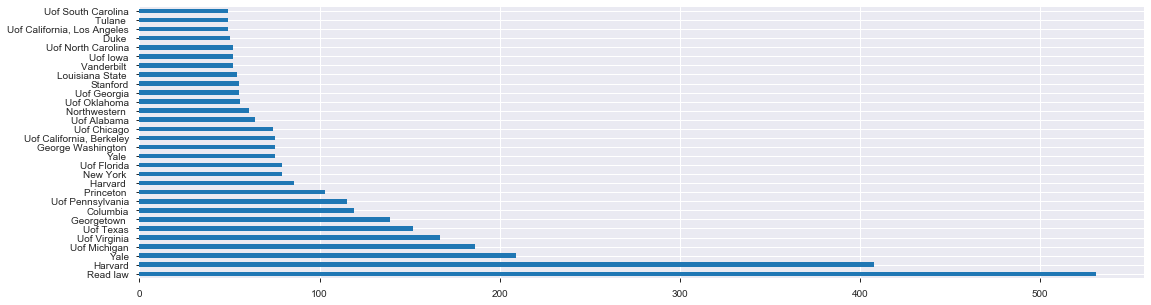

In [61]:
allschool_df.cleaned.value_counts().head(30).plot(kind='barh', figsize=(18, 5))

In [51]:
allschool_df.to_csv('allschool.csv', index=False)

In [ ]:
df[df['School_1'].isin(['Harvard University', 'Yale University', 'Brown University', 'Columbia University', 'Princeton University'])]

In [24]:
df['Confirmation_Duration_Total'] = df.Confirmation_Date_1 - df.Nomination_Date_1
# df.Confirmation_Duration_Total.sort_values(ascending=False).head(60)
df.Confirmation_Duration_Total.max()

Timedelta('639 days 00:00:00')

In [ ]:
timedelta

In [ ]:
# df[df['date'] >='20140905'].head()

In [ ]:
# df[(df['sku'].str.contains('B1-531')) & (df['quantity']>40)].sort(columns=['quantity','name'],ascending=[0,1])